## Regession in Scikit-Learn



In [1]:
# libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### simple linear regression


Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:

1. One variable, denoted x, is regarded as the predictor, explanatory, or independent variable.
2. The other variable, denoted y, is regarded as the response, outcome, or dependent variable.

The simple linear regression model provides a quantitative estimate of the relationship between the predictor variable and the response variable. It assumes that this relationship is linear (i.e., a straight line). 

The general form of the simple linear regression model is:



Sure, let's break down the assumptions of simple linear regression into simpler terms:

1. **Linearity**: This means that the relationship between your input (independent variable) and output (dependent variable) is a straight line. If you were to plot your data points, they should roughly form a straight line.

2. **Independence**: This means that the data points do not depend on each other. The outcome of one does not influence the outcome of another.

3. **Homoscedasticity**: This fancy term simply means that the spread of your residuals (the differences between the actual and predicted values) is constant across all values of your independent variable. In other words, the spread of your data should be even throughout.

4. **Normality**: This means that if you were to plot the residuals, they should form a pattern that looks like a bell curve (normal distribution).

5. **No Multicollinearity**: This is relevant for multiple linear regression (when you have more than one independent variable). It means that your independent variables should not be too closely related to each other. For example, if you were predicting house prices and had both 'house size in square feet' and 'number of rooms' as independent variables, these might be too closely related because larger houses usually have more rooms.

In [3]:
y = a + bx + e

NameError: name 'a' is not defined



where:
- y is the dependent variable.
- x is the independent variable.
- a is the y-intercept.
- b is the slope.
- e is the error term.

The goal of simple linear regression is to create a linear model that minimizes the sum of squares of the residuals/error (difference between actual and predicted values).

In [ ]:
df_linear=df[['age','fare']]
df_linear





,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [ ]:
# simple linear regression.
x=df[['age']]
y=df[['fare']]

In [ ]:
# checking null value in  and y.
x.isnull().sum()

age    177
dtype: int64

In [ ]:
y.isnull().sum()

fare    0
dtype: int64

In [ ]:
df_linear.age.fillna(value= df_linear['age'].mean(),inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12728\2319506619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear.age.fillna(value= df_linear['age'].mean(),inplace=True)


In [ ]:
df_linear.isnull().sum()

age     0
fare    0
dtype: int64

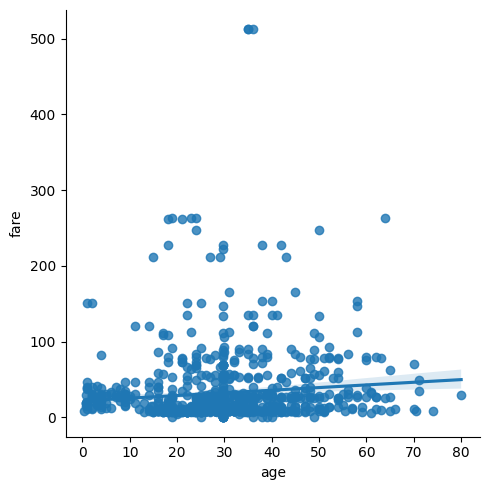

In [ ]:
sns.lmplot(data=df_linear, x='age', y='fare')


<Axes: ylabel='age'>

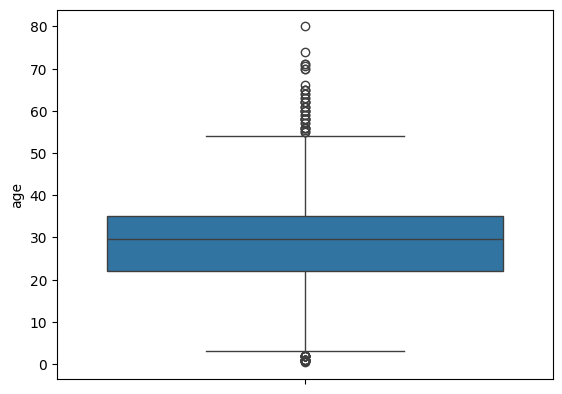

In [ ]:
sns.boxplot(data=df_linear,y='age')

In [ ]:
df_linear=df_linear[(df_linear['age']>5) & (df_linear['age']<55)]

<Axes: ylabel='age'>

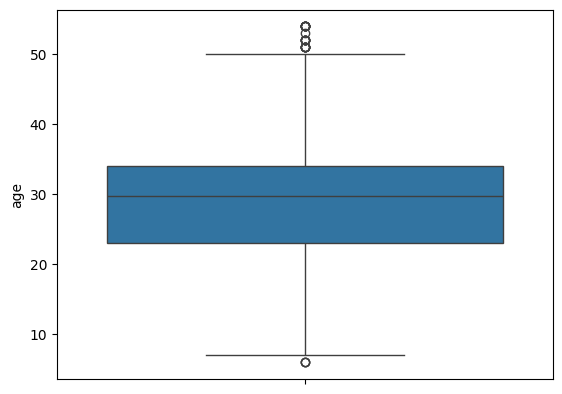

In [ ]:
sns.boxplot(data=df_linear,y='age')

In [ ]:
df_linear=df_linear[(df_linear['age']>8) & (df_linear['age']<50)]

<Axes: ylabel='age'>

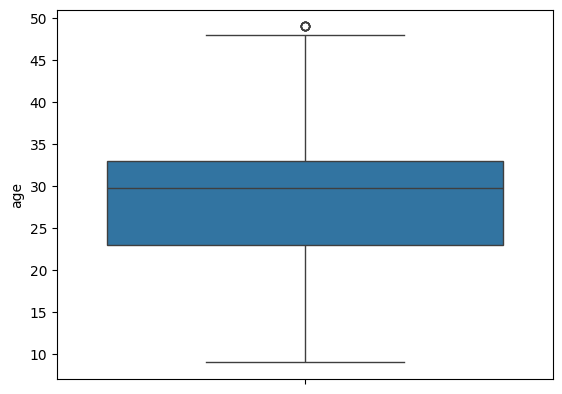

In [ ]:
sns.boxplot(data=df_linear,y='age')


<Axes: ylabel='fare'>

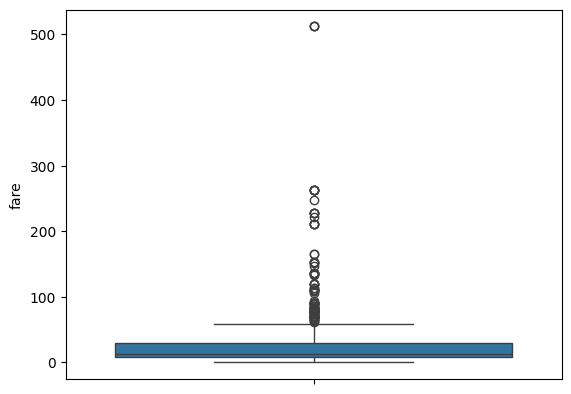

In [ ]:
sns.boxplot(data=df_linear,y='fare')

In [ ]:
df_linear=df_linear[(df_linear['fare']>1) & (df_linear['fare']<40)]

<Axes: ylabel='fare'>

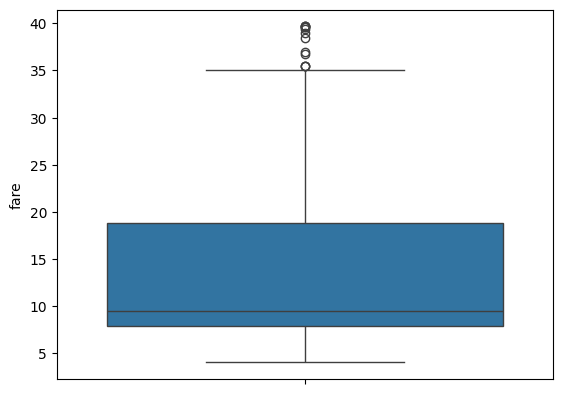

In [ ]:
sns.boxplot(data=df_linear,y='fare')


In [ ]:
## IMPORTANT ONE
X=df_linear[['age']] # x always capital and the contets of X should be in double brackets. [[]] not for y .
y=df_linear['fare']


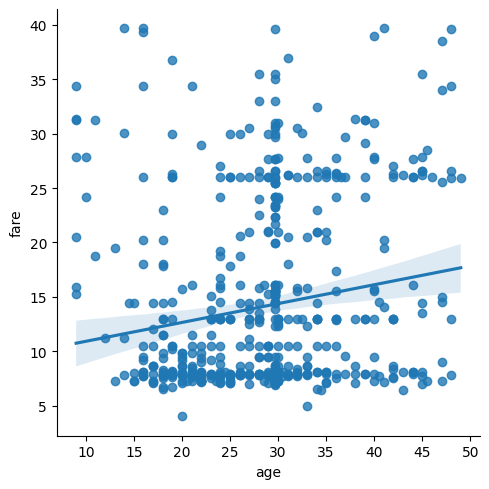

In [ ]:
sns.lmplot(data=df_linear, x='age', y='fare')

In [ ]:
# in this graph points doesnot satisy with line drawn so it is essential to line should be near to all points.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model=LinearRegression() 
# training te model
model.fit(X,y)



LinearRegression()

In [ ]:
#predictin
model.predict([[80]])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.05317906])

In [ ]:
# model evaluation with metrics
# r square
# mean square error
# MAE
# RMSE
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.8)


In [ ]:
X_train.shape

(482, 1)

In [ ]:
X_test.shape

(121, 1)

In [ ]:
model= LinearRegression()
# train
model.fit(X_train,y_train)
# Pridiction
pridictions=model.predict(X_test)


In [ ]:
# Train Test Theory:
# we have two columns as fare and age we split both 80 and 20 percent data as x,y test_train data.
# Age = X_train (80%)                       #fare= y_train(80%)
# Age = X_test (20%)                         fare = y_test(20%)
# we prepare model according to fare(y)
# we will give x_test values to model.predict(X_test).
# Result will be predicted value
# Then we will compare predicted value(x-test) with original value with Y-test.
# Accuracy will give the final result.




<Axes: xlabel='fare'>

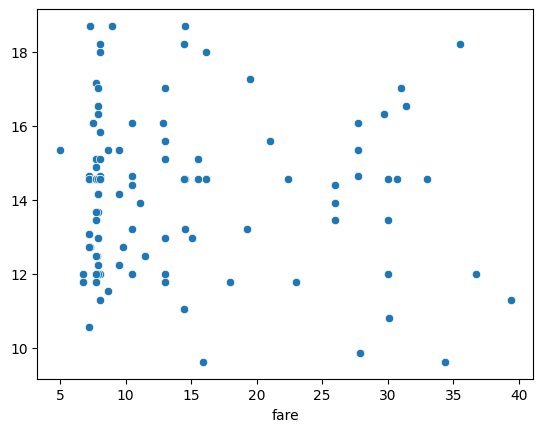

In [ ]:
#compare
sns.scatterplot(x=y_test, y=pridictions)

In [ ]:
# this plot demonstartes that fare y_test and pridiction should be same and linear line should formed to be more specific.
# example: if fare and pridiction are same so it will be accuarate


In [ ]:
model.score(X_test,y_test)

-0.09283170274339936

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
MNE=mean_squared_error(y_test,pridictions)
print (MNE)

MAE=mean_absolute_error(y_test,pridictions)
print (MAE)

RMSE=np.sqrt(MNE)
print (RMSE)

R2=r2_score(y_test,pridictions)
print (R2)



78.58946437937769
7.214518943283758
8.865069902678584
-0.09283170274339936


This code is evaluating the performance of a regression model. Here's a breakdown:

1. `from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score`: This line imports the necessary functions from `sklearn.metrics` to evaluate the model.

2. `MNE=mean_squared_error(y_test,pridictions)`: This line calculates the Mean Squared Error (MSE) between the actual test outcomes (`y_test`) and the model's predictions (`pridictions`). MSE is the average of the squares of the errors (the difference between the actual and predicted values).

3. `print (MNE)`: This line prints the MSE.

4. `MAE=mean_absolute_error(y_test,pridictions)`: This line calculates the Mean Absolute Error (MAE) between the actual test outcomes and the model's predictions. MAE is the average of the absolute differences between the actual and predicted values.

5. `print (MAE)`: This line prints the MAE.

6. `RMSE=np.sqrt(MNE)`: This line calculates the Root Mean Squared Error (RMSE) by taking the square root of the MSE. RMSE is a commonly used measure to evaluate regression models as it penalizes large errors more due to the squaring operation.

7. `print (RMSE)`: This line prints the RMSE.

8. `R2=r2_score(y_test,pridictions)`: This line calculates the R-squared (R2) score between the actual test outcomes and the model's predictions. The R2 score is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

9. `print (R2)`: This line prints the R2 score.

In summary, this code is calculating and printing four metrics (MSE, MAE, RMSE, and R2) that are commonly used to evaluate the performance of regression models.